# Water Level Forecasting

## Problem Statement
### Objective
Venezia is an Italian city built on a lagoon, a body of water separated from the sea by a strip of land. However, this city is frequently subject to flooding during autumn and spring due to the "acqua alta", a tide that raises the water level to the point that the sea invades the city. 
This phenomenon causes great complications in the city. The forecast of the water level is therefore a fundamental task for the safeguard of the city of Venezia.

### Dataset & Data Description
The dataset contains hourly measurements of the water level in Venezia from 1983-01-01 to 2016-01-01.


To load the dataset, use the following link: https://www.kaggle.com/datasets/lbronchal/venezia


#### Data Description:

Attribute Information:

* datetime: date and hour of the measurement in utc time
* level: level of the water in cm from the reference point

## Solution steps:
1. Load data
2. EDA implementation
3. Data Processing & Transformation 
4. Preparation of Train, Valid and Test datasets
5. Build, Train & Evaluate the model
 


### **Load Libraries**

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_datareader as pdr
from datetime import datetime
from pandas import DataFrame
from pandas import concat
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM ,Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error
from sklearn import metrics  
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from matplotlib import pyplot

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Load Data**

In [3]:
data = pd.read_csv('/content/drive/MyDrive/venezia.csv')

In [4]:
data.head()

,datetime,level
0,1983-01-01 01:00:00,44.0
1,1983-01-01 02:00:00,35.0
2,1983-01-01 03:00:00,23.0
3,1983-01-01 04:00:00,10.0
4,1983-01-01 05:00:00,1.0


In [5]:
data.shape

(289272, 2)

### **Exploratory Data Analysis** 

In [6]:
print("Start: ", data['datetime'].min())
print("End: ", data['datetime'].max())

Start:  1983-01-01 01:00:00
End:  2016-01-01 00:00:00


In [7]:
data[['date', 'time']] = data['datetime'].str.split(' ', 1, expand=True)

In [8]:
data.head()

,datetime,level,date,time
0,1983-01-01 01:00:00,44.0,1983-01-01,01:00:00
1,1983-01-01 02:00:00,35.0,1983-01-01,02:00:00
2,1983-01-01 03:00:00,23.0,1983-01-01,03:00:00
3,1983-01-01 04:00:00,10.0,1983-01-01,04:00:00
4,1983-01-01 05:00:00,1.0,1983-01-01,05:00:00


In [9]:
data = data.drop(labels=['datetime'],axis=1)

In [10]:
data.head()

,level,date,time
0,44.0,1983-01-01,01:00:00
1,35.0,1983-01-01,02:00:00
2,23.0,1983-01-01,03:00:00
3,10.0,1983-01-01,04:00:00
4,1.0,1983-01-01,05:00:00


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289272 entries, 0 to 289271
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   level   289272 non-null  float64
 1   date    289272 non-null  object 
 2   time    289272 non-null  object 
dtypes: float64(1), object(2)
memory usage: 6.6+ MB


In [12]:
data.describe()

,level
count,289272.000000
mean,25.883449
std,29.130133
min,-92.000000
25%,6.000000
50%,27.000000
75%,47.000000
max,159.000000


In [13]:
data.isnull().sum()

level    0
date     0
time     0
dtype: int64

In [14]:
data['date'] = pd.to_datetime(data['date'])

In [15]:
data['time'] = pd.to_datetime(data['time'])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289272 entries, 0 to 289271
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   level   289272 non-null  float64       
 1   date    289272 non-null  datetime64[ns]
 2   time    289272 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1)
memory usage: 6.6 MB


In [17]:
data.head()

,level,date,time
0,44.0,1983-01-01,2022-10-03 01:00:00
1,35.0,1983-01-01,2022-10-03 02:00:00
2,23.0,1983-01-01,2022-10-03 03:00:00
3,10.0,1983-01-01,2022-10-03 04:00:00
4,1.0,1983-01-01,2022-10-03 05:00:00


In [18]:
# Not converting into seperate columns
df = pd.read_csv('/content/drive/MyDrive/venezia.csv')

In [19]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289272 entries, 0 to 289271
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datetime  289272 non-null  datetime64[ns]
 1   level     289272 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.4 MB


In [21]:
df.head()

,datetime,level
0,1983-01-01 01:00:00,44.0
1,1983-01-01 02:00:00,35.0
2,1983-01-01 03:00:00,23.0
3,1983-01-01 04:00:00,10.0
4,1983-01-01 05:00:00,1.0


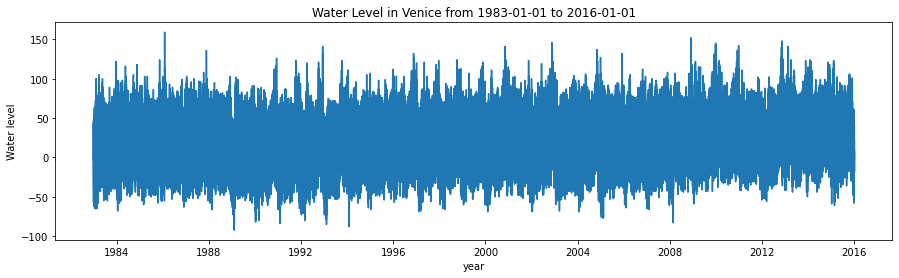

In [22]:
plt.figure(figsize=(15,4))
plt.plot(df['datetime'],df['level'])
plt.gca().set(title='Water Level in Venice from 1983-01-01 to 2016-01-01', xlabel='year', ylabel='Water level')
plt.show()

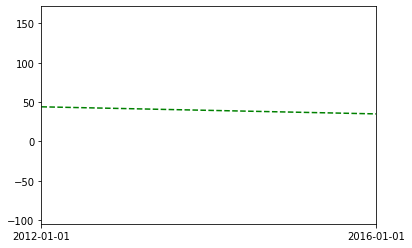

In [23]:
df['level'].plot(xlim=['2012-01-01','2016-01-01'],ls='--',c='green')

In [24]:
df.index

RangeIndex(start=0, stop=289272, step=1)

In [25]:
datetime.now()

datetime.datetime(2022, 10, 3, 10, 48, 9, 929764)

#Time Resampling

In [26]:
df.head()

,datetime,level
0,1983-01-01 01:00:00,44.0
1,1983-01-01 02:00:00,35.0
2,1983-01-01 03:00:00,23.0
3,1983-01-01 04:00:00,10.0
4,1983-01-01 05:00:00,1.0


In [27]:
df = df.set_index('datetime',drop=True)

In [28]:
#In each year it shows what is the minimum sea level
#Rule A means year and frequency
df.resample(rule='A').min()

,level
datetime,
1983-12-31,-65.0
1984-12-31,-68.0
1985-12-31,-60.0
1986-12-31,-63.0
1987-12-31,-56.0
1988-12-31,-66.0
1989-12-31,-92.0
1990-12-31,-82.0
1991-12-31,-84.0


In [29]:
#In each year it shows what is the maximum sea level
df.resample(rule='A').max()

,level
datetime,
1983-12-31,122.0
1984-12-31,118.0
1985-12-31,124.0
1986-12-31,159.0
1987-12-31,136.0
1988-12-31,103.0
1989-12-31,102.0
1990-12-31,126.0
1991-12-31,123.0


In [30]:
df['2015-12-31']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


,level
datetime,
2015-12-31 00:00:00,23.0
2015-12-31 01:00:00,32.0
2015-12-31 02:00:00,39.0
2015-12-31 03:00:00,41.0
2015-12-31 04:00:00,38.0
2015-12-31 05:00:00,28.0
2015-12-31 06:00:00,17.0
2015-12-31 07:00:00,8.0
2015-12-31 08:00:00,2.0


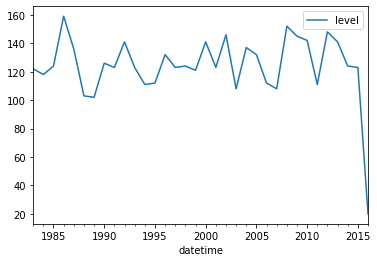

In [31]:
df.resample(rule='A').max().plot()
#Now we can see the trend of maximum value clearly

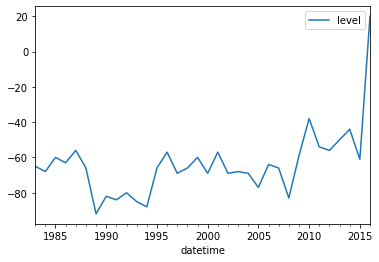

In [32]:
df.resample(rule='A').min().plot()

In [33]:
#Quarterly
df.resample(rule='QS').max()

,level
datetime,
1983-01-01,105.0
1983-04-01,100.0
1983-07-01,89.0
1983-10-01,122.0
1984-01-01,98.0
...,...
2015-01-01,123.0
2015-04-01,102.0
2015-07-01,91.0


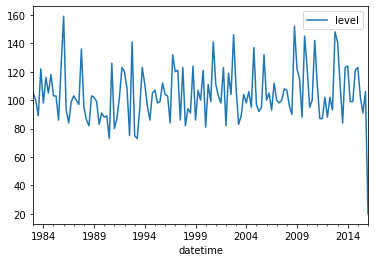

In [34]:
df.resample(rule='QS').max().plot()

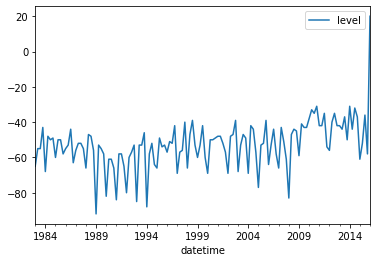

In [35]:
df.resample(rule='QS').min().plot()

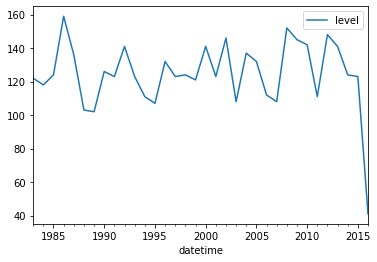

In [36]:
#Till the last Business day
df.resample(rule='BA').max().plot()

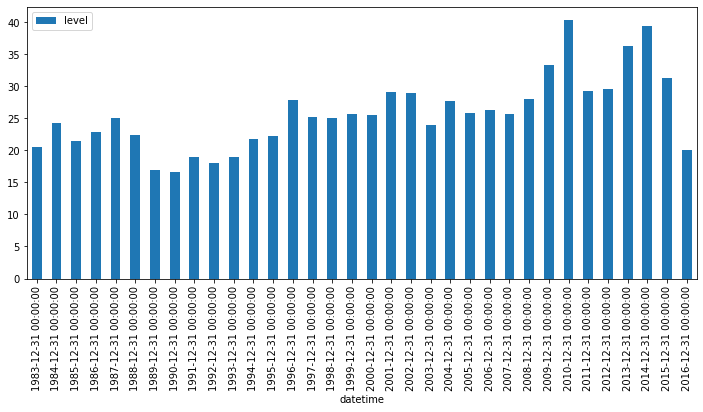

In [37]:
df.resample(rule='A').mean().plot(kind='bar',figsize=(12,5))

### **Data Processing & Transformation** 

In [38]:
 #Extracting features from date and time this way creating  new features.
data['Month'] = [i.month for i in data['date']]
data['Year'] = [i.year for i in data['date']]
data['day'] = [i.day for i in data['date']]
data['Hour'] = [i.hour for i in data['time']]
data['Minute'] = [i.minute for i in data['time']]
data['Second'] = [i.second for i in data['time']]
#drop unnecessary  columns and re-arrange
data.drop('Minute',axis=1, inplace=True)
data.drop('Second',axis=1, inplace=True)
data = data[['Year', 'Month', 'day', 'Hour', 'level']]
data

,Year,Month,day,Hour,level
0,1983,1,1,1,44.0
1,1983,1,1,2,35.0
2,1983,1,1,3,23.0
3,1983,1,1,4,10.0
4,1983,1,1,5,1.0
...,...,...,...,...,...
289267,2015,12,31,20,-18.0
289268,2015,12,31,21,-14.0
289269,2015,12,31,22,-5.0
289270,2015,12,31,23,8.0


We consider water level forecasting as a problem in which we try to predict the water level at a specific time in the future.

A simple approach to do this is to use shifted (lagged) values to predict the value at the next time (t+1) given the value at the current time (t).

We used a one-step setup, where the model will learn to predict a single point in the future.

In [39]:
#create a dataframe that contains water level values at 't'
temps = DataFrame(data['level'].values)
# shift forward and concatenate with data
temps_shift = concat([temps.shift(1, axis = 0),temps], axis=1)
data = concat([data, temps_shift], axis=1)
#drop repeated column
data.drop('level',axis=1, inplace=True)
#re-arrange
data.columns = ['Year', 'Month', 'day', 'Hour','t', 't+1']
#drop the first row with NaN value
data.dropna(axis=0, inplace=True)
data

,Year,Month,day,Hour,t,t+1
1,1983,1,1,2,44.0,35.0
2,1983,1,1,3,35.0,23.0
3,1983,1,1,4,23.0,10.0
4,1983,1,1,5,10.0,1.0
5,1983,1,1,6,1.0,-1.0
...,...,...,...,...,...,...
289267,2015,12,31,20,-19.0,-18.0
289268,2015,12,31,21,-18.0,-14.0
289269,2015,12,31,22,-14.0,-5.0
289270,2015,12,31,23,-5.0,8.0


##Prepare Train/ Valid/ Test Data
1. Spliting train / valid / test datasets

It is important to ensure that the spliting is not done randomly because we want our test data to contain points that are in the future from the points in the train data 

2. Separating the input and output variables


* 5 input variables (input features) :  Year, Month, day, Hour, water level at time 't'.

* Output variable to forecast : water level at time 't+1'.

In [40]:
train = data[data['Year'] <= 2011]
valid = data[(data['Year'] > 2011) & (data['Year'] < 2015)]
test = data[data['Year'] >= 2015]

In [41]:
#Separating the input and output variables
train_X = train.iloc[:,:-1]
train_y = train.iloc[:,-1]
valid_X = valid.iloc[:,:-1]
valid_y = valid.iloc[:,-1]
test_X = test.iloc[:,:-1]
test_y = test.iloc[:,-1]

In [42]:
train_X = train_X.values
print('train_X shape:', train_X.shape)
train_y = train_y.values
print('train_y shape:', train_y.shape)
valid_X = valid_X.values
print('valid_X shape:', valid_X.shape)
valid_y = valid_y.values
print('valid_y shape:', valid_y.shape)
test_X = test_X.values
print('test_X shape:', test_X.shape)
test_y = test_y.values
print('test_y shape:', test_y.shape)

train_X shape: (254206, 5)
train_y shape: (254206,)
valid_X shape: (26304, 5)
valid_y shape: (26304,)
test_X shape: (8761, 5)
test_y shape: (8761,)


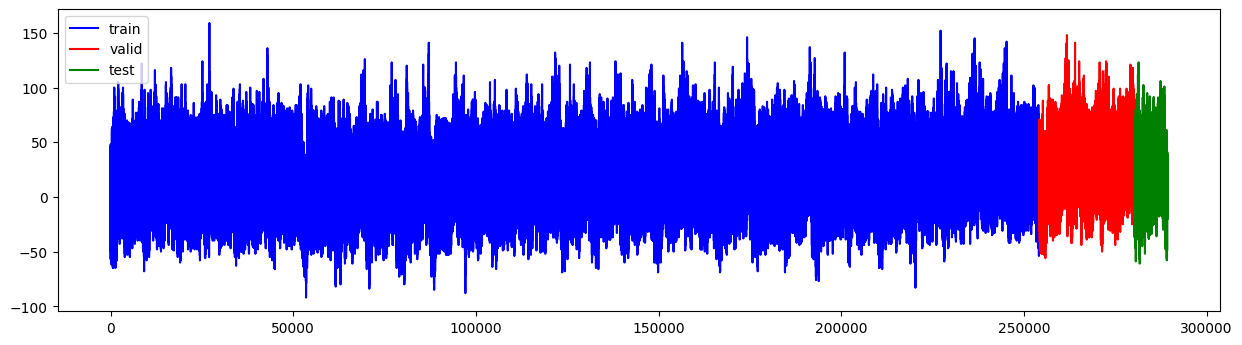

In [43]:
#plot the distribution of train /valid/ test samples
x1=np.arange(0,254206)
x2 = np.arange(254206,280510)
x3 = np.arange(280510,289271)
plt.figure(figsize=(15,4), dpi=100)
plt.plot(x1,train_y,'b',label='train')
plt.plot(x2, valid_y, 'r', label='valid')
plt.plot(x3,test_y,'g',label='test')

plt.legend(loc='best')

##Model Building

1. Multi Layer Perceptron


Input shape [samples, timesteps].



In [74]:
model_mlp = Sequential()
model_mlp.add(Dense(100,activation='relu', input_dim=train_X.shape[1]))
model_mlp.add(Dense(50,activation='relu'))
model_mlp.add(Dense(25,activation='relu'))
model_mlp.add(Dense(units=1))
model_mlp.compile(loss="mse", optimizer="adam", metrics=['mse', 'mae'])
model_mlp.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 100)               600       
                                                                 
 dense_22 (Dense)            (None, 50)                5050      
                                                                 
 dense_23 (Dense)            (None, 25)                1275      
                                                                 
 dense_24 (Dense)            (None, 1)                 26        
                                                                 
Total params: 6,951
Trainable params: 6,951
Non-trainable params: 0
_________________________________________________________________


In [75]:
mlp_history = model_mlp.fit(train_X, train_y, validation_data=(valid_X, valid_y), epochs=10, verbose=2)

Epoch 1/10
7944/7944 - 19s - loss: 137.5467 - mse: 137.5467 - mae: 9.7108 - val_loss: 110.7098 - val_mse: 110.7098 - val_mae: 8.9682 - 19s/epoch - 2ms/step
Epoch 2/10
7944/7944 - 18s - loss: 124.3792 - mse: 124.3792 - mae: 9.3801 - val_loss: 115.5011 - val_mse: 115.5011 - val_mae: 9.1337 - 18s/epoch - 2ms/step
Epoch 3/10
7944/7944 - 20s - loss: 122.3326 - mse: 122.3326 - mae: 9.3200 - val_loss: 110.9121 - val_mse: 110.9121 - val_mae: 8.9434 - 20s/epoch - 2ms/step
Epoch 4/10
7944/7944 - 18s - loss: 121.5140 - mse: 121.5140 - mae: 9.2963 - val_loss: 111.1053 - val_mse: 111.1053 - val_mae: 8.9844 - 18s/epoch - 2ms/step
Epoch 5/10
7944/7944 - 20s - loss: 120.9640 - mse: 120.9640 - mae: 9.2807 - val_loss: 111.5525 - val_mse: 111.5525 - val_mae: 8.9715 - 20s/epoch - 2ms/step
Epoch 6/10
7944/7944 - 20s - loss: 120.6790 - mse: 120.6790 - mae: 9.2726 - val_loss: 111.3733 - val_mse: 111.3733 - val_mae: 8.9546 - 20s/epoch - 3ms/step
Epoch 7/10
7944/7944 - 18s - loss: 120.4269 - mse: 120.4269 - ma

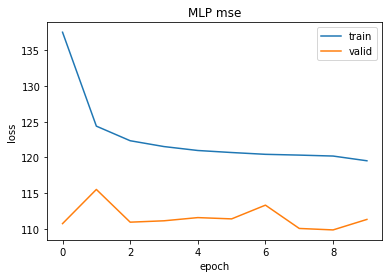

In [76]:
# summarize history for loss
plt.plot(mlp_history.history['mse'])
plt.plot(mlp_history.history['val_mse'])
plt.title('MLP mse')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

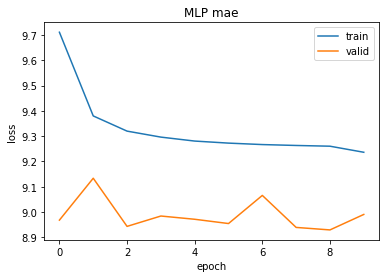

In [77]:
# summarize history for loss
plt.plot(mlp_history.history['mae'])
plt.plot(mlp_history.history['val_mae'])
plt.title('MLP mae')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [78]:
mlp_train_pred = model_mlp.predict(train_X)
mlp_valid_pred = model_mlp.predict(valid_X)
mlp_test_pred = model_mlp.predict(test_X)
print('Train rmse:', np.sqrt(mean_squared_error(train_y ,mlp_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(valid_y, mlp_valid_pred)))
print('***************************************************************')
print('Test rmse:', np.sqrt(mean_squared_error(test_y, mlp_test_pred)))
print('Test mae :', metrics.mean_absolute_error(test_y, mlp_test_pred))
print('Test mse :', metrics.mean_squared_error(test_y, mlp_test_pred))


Train rmse: 10.860561809159908
Validation rmse: 10.549775477045925
***************************************************************
Test rmse: 10.640009171603575
Test mae : 9.085780790153315
Test mse : 113.20979517180821


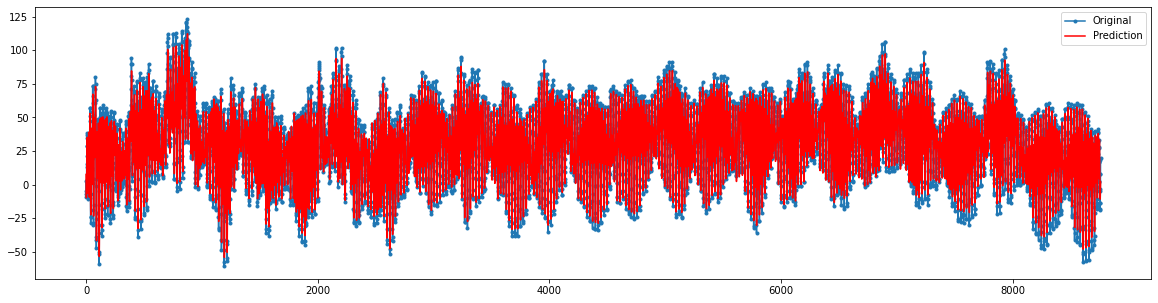

In [79]:
plt.figure(figsize=(20,5))
plt.plot(test_y, marker = '.', label='Original')
plt.plot(mlp_test_pred, color='red', label='Prediction')
plt.legend()

2. Convolutional Neural Network

Input shape [samples, features, timesteps




In [52]:
#reshape the train/valid/test datasets as it matche the CNN input
train_Xcnn = train_X.reshape((train_X.shape[0], train_X.shape[1], 1))
valid_Xcnn = valid_X.reshape((valid_X.shape[0], valid_X.shape[1], 1))
test_Xcnn = test_X.reshape((test_X.shape[0], test_X.shape[1], 1))
print('Train set shape', train_Xcnn.shape)
print('Validation set shape', valid_Xcnn.shape)
print('Validation set shape', test_Xcnn.shape)


Train set shape (254206, 5, 1)
Validation set shape (26304, 5, 1)
Validation set shape (8761, 5, 1)


In [89]:
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(train_Xcnn.shape[1], train_Xcnn.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(loss="mse", optimizer="adam",metrics=['mse', 'mae'])

model_cnn.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 4, 64)             192       
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 2, 64)            0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 50)                6450      
                                                                 
 dense_28 (Dense)            (None, 1)                 51        
                                                                 
Total params: 6,693
Trainable params: 6,693
Non-trainable params: 0
___________________________________________________

In [90]:
cnn_history = model_cnn.fit(train_Xcnn, train_y, validation_data=(valid_Xcnn, valid_y), epochs=10, verbose=2)


Epoch 1/10
7944/7944 - 27s - loss: 175.2165 - mse: 175.2165 - mae: 9.8739 - val_loss: 110.4530 - val_mse: 110.4530 - val_mae: 8.9545 - 27s/epoch - 3ms/step
Epoch 2/10
7944/7944 - 22s - loss: 121.7350 - mse: 121.7350 - mae: 9.2882 - val_loss: 109.9398 - val_mse: 109.9398 - val_mae: 8.9356 - 22s/epoch - 3ms/step
Epoch 3/10
7944/7944 - 20s - loss: 118.5348 - mse: 118.5348 - mae: 9.1928 - val_loss: 107.4811 - val_mse: 107.4811 - val_mae: 8.8533 - 20s/epoch - 3ms/step
Epoch 4/10
7944/7944 - 20s - loss: 117.3737 - mse: 117.3737 - mae: 9.1571 - val_loss: 107.0185 - val_mse: 107.0185 - val_mae: 8.8322 - 20s/epoch - 3ms/step
Epoch 5/10
7944/7944 - 20s - loss: 116.4144 - mse: 116.4144 - mae: 9.1292 - val_loss: 106.1941 - val_mse: 106.1941 - val_mae: 8.8101 - 20s/epoch - 3ms/step
Epoch 6/10
7944/7944 - 22s - loss: 115.4648 - mse: 115.4648 - mae: 9.0958 - val_loss: 105.9638 - val_mse: 105.9638 - val_mae: 8.8153 - 22s/epoch - 3ms/step
Epoch 7/10
7944/7944 - 22s - loss: 113.2047 - mse: 113.2047 - ma

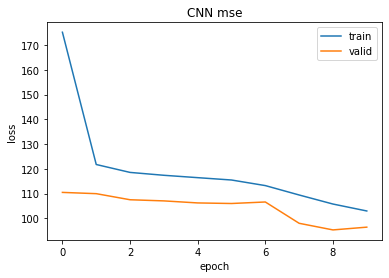

In [92]:
# summarize history for loss
plt.plot(cnn_history.history['mse'])
plt.plot(cnn_history.history['val_mse'])
plt.title('CNN mse')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

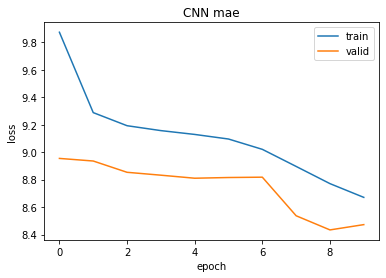

In [93]:
# summarize history for loss
plt.plot(cnn_history.history['mae'])
plt.plot(cnn_history.history['val_mae'])
plt.title('CNN mae')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [94]:

cnn_train_pred = model_cnn.predict(train_Xcnn)
cnn_valid_pred = model_cnn.predict(valid_Xcnn)
cnn_test_pred = model_cnn.predict(test_Xcnn)

print('Train rmse:', np.sqrt(mean_squared_error(train_y ,cnn_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(valid_y, cnn_valid_pred)))
print('***************************************************************')
print('Test rmse:', np.sqrt(mean_squared_error(test_y, cnn_test_pred)))
print('Test mae :', metrics.mean_absolute_error(test_y, cnn_test_pred))
print('Test mse :', metrics.mean_squared_error(test_y, cnn_test_pred))


Train rmse: 10.098354456184333
Validation rmse: 9.818288949123053
***************************************************************
Test rmse: 9.844927940243048
Test mae : 8.506171979422561
Test mse : 96.92260614857823


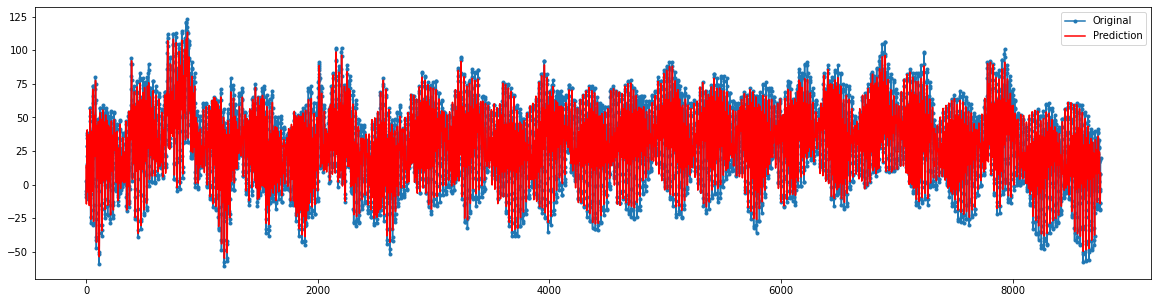

In [95]:
plt.figure(figsize=(20,5))
plt.plot(test_y, marker = '.', label='Original')
plt.plot(cnn_test_pred, color='red', label='Prediction')
plt.legend()

3. Long Short Term Memory

Input shape [samples, features, timesteps] same as CNN

In [57]:
model_lstm = Sequential()
# First LSTM layer with Dropout regularisation
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(train_Xcnn.shape[1], train_Xcnn.shape[2]), activation='tanh'))
model_lstm.add(Dropout(0.2))
# Second LSTM layer
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(train_Xcnn.shape[1], train_Xcnn.shape[2]), activation='tanh'))
model_lstm.add(Dropout(0.2))
# Third LSTM layer
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(train_Xcnn.shape[1], train_Xcnn.shape[2]), activation='tanh'))
model_lstm.add(Dropout(0.2))
# Fourth LSTM layer
model_lstm.add(LSTM(units=50, activation='tanh'))
model_lstm.add(Dropout(0.2))
# The output layer
model_lstm.add(Dense(units=1))
model_lstm.compile(loss="mse", optimizer="adam", metrics=['mse', 'mae'])
model_lstm.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 50)             10400     
                                                                 
 dropout_13 (Dropout)        (None, 5, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 5, 50)             20200     
                                                                 
 dropout_14 (Dropout)        (None, 5, 50)             0         
                                                                 
 lstm_2 (LSTM)               (None, 5, 50)             20200     
                                                                 
 dropout_15 (Dropout)        (None, 5, 50)             0         
                                                                 
 lstm_3 (LSTM)               (None, 50)               

In [58]:
lstm_history = model_lstm.fit(train_Xcnn, train_y, validation_data=(valid_Xcnn, valid_y), epochs=10, verbose=2)


Epoch 1/10
7944/7944 - 66s - loss: 314.5791 - mse: 314.5791 - mae: 13.2477 - val_loss: 101.6997 - val_mse: 101.6997 - val_mae: 8.5752 - 66s/epoch - 8ms/step
Epoch 2/10
7944/7944 - 59s - loss: 116.2180 - mse: 116.2180 - mae: 8.9872 - val_loss: 90.3470 - val_mse: 90.3470 - val_mae: 8.1905 - 59s/epoch - 7ms/step
Epoch 3/10
7944/7944 - 58s - loss: 104.7004 - mse: 104.7004 - mae: 8.6526 - val_loss: 85.8616 - val_mse: 85.8616 - val_mae: 8.0319 - 58s/epoch - 7ms/step
Epoch 4/10
7944/7944 - 58s - loss: 100.9633 - mse: 100.9633 - mae: 8.5299 - val_loss: 87.5499 - val_mse: 87.5499 - val_mae: 8.0951 - 58s/epoch - 7ms/step
Epoch 5/10
7944/7944 - 58s - loss: 98.9611 - mse: 98.9611 - mae: 8.4703 - val_loss: 83.3011 - val_mse: 83.3011 - val_mae: 7.9754 - 58s/epoch - 7ms/step
Epoch 6/10
7944/7944 - 58s - loss: 97.8126 - mse: 97.8126 - mae: 8.4318 - val_loss: 90.1720 - val_mse: 90.1720 - val_mae: 8.1566 - 58s/epoch - 7ms/step
Epoch 7/10
7944/7944 - 60s - loss: 96.9687 - mse: 96.9687 - mae: 8.4026 - val

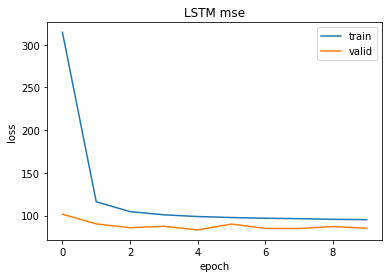

In [59]:
# summarize history for loss
plt.plot(lstm_history.history['mse'])
plt.plot(lstm_history.history['val_mse'])
plt.title('LSTM mse')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

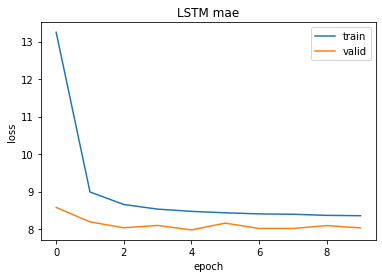

In [60]:
# summarize history for loss
plt.plot(lstm_history.history['mae'])
plt.plot(lstm_history.history['val_mae'])
plt.title('LSTM mae')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [61]:
lstm_train_pred = model_lstm.predict(train_Xcnn)
lstm_valid_pred = model_lstm.predict(valid_Xcnn)
lstm_test_pred = model_lstm.predict(test_Xcnn)
print('Train rmse:', np.sqrt(mean_squared_error(train_y ,lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(valid_y, lstm_valid_pred)))
print('***************************************************************')
print('Test rmse:', np.sqrt(mean_squared_error(test_y, lstm_test_pred)))
print('Test mae :', metrics.mean_absolute_error(test_y, lstm_test_pred))
print('Test mse :', metrics.mean_squared_error(test_y, lstm_test_pred))

Train rmse: 9.178078202272202
Validation rmse: 9.233544438758639
***************************************************************
Test rmse: 9.122088160107143
Test mae : 7.988201524770202
Test mse : 83.21249240076692


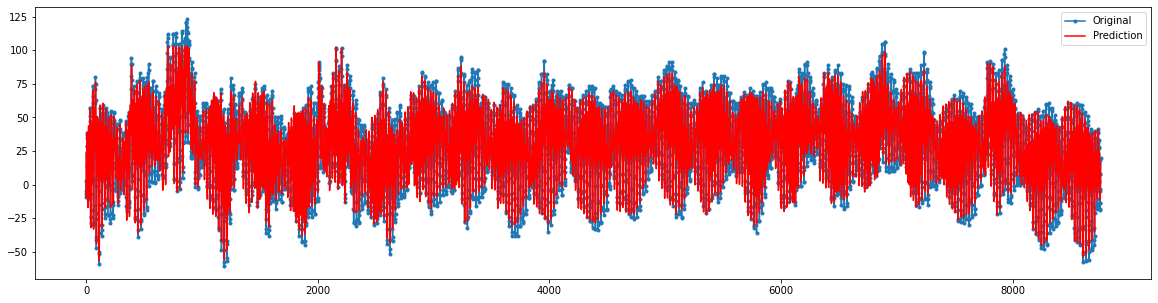

In [62]:
plt.figure(figsize=(20,5))
plt.plot(test_y, marker = '.', label='Original')
plt.plot(lstm_test_pred, color='red', label='Prediction')
plt.legend()

3. Gated Reccurrent Unit


In [63]:
model_gru = Sequential()
# First GRU layer with Dropout regularisation
model_gru.add(GRU(units=50, return_sequences=True, input_shape=(train_Xcnn.shape[1], train_Xcnn.shape[2]), activation='tanh'))
model_gru.add(Dropout(0.2))
# Second GRU layer
model_gru.add(GRU(units=50, return_sequences=True, input_shape=(train_Xcnn.shape[1], train_Xcnn.shape[2]), activation='tanh'))
model_gru.add(Dropout(0.2))
# Third GRU layer
model_gru.add(GRU(units=50, return_sequences=True, input_shape=(train_Xcnn.shape[1], train_Xcnn.shape[2]), activation='tanh'))
model_gru.add(Dropout(0.2))
# Fourth GRU layer
model_gru.add(GRU(units=50, activation='tanh'))
model_gru.add(Dropout(0.2))
# The output layer
model_gru.add(Dense(units=1))
model_gru.compile(loss="mse", optimizer="adam", metrics=['mse', 'mae'])
model_gru.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 5, 50)             7950      
                                                                 
 dropout_17 (Dropout)        (None, 5, 50)             0         
                                                                 
 gru_1 (GRU)                 (None, 5, 50)             15300     
                                                                 
 dropout_18 (Dropout)        (None, 5, 50)             0         
                                                                 
 gru_2 (GRU)                 (None, 5, 50)             15300     
                                                                 
 dropout_19 (Dropout)        (None, 5, 50)             0         
                                                                 
 gru_3 (GRU)                 (None, 50)               

In [64]:
gru_history = model_gru.fit(train_X, train_y, validation_data=(valid_X, valid_y), epochs=10, verbose=2)

Epoch 1/10
7944/7944 - 62s - loss: 189.9536 - mse: 189.9536 - mae: 10.6984 - val_loss: 106.6015 - val_mse: 106.6015 - val_mae: 8.6492 - 62s/epoch - 8ms/step
Epoch 2/10
7944/7944 - 53s - loss: 110.5094 - mse: 110.5094 - mae: 8.8126 - val_loss: 95.1590 - val_mse: 95.1590 - val_mae: 8.2926 - 53s/epoch - 7ms/step
Epoch 3/10
7944/7944 - 52s - loss: 103.3928 - mse: 103.3928 - mae: 8.5998 - val_loss: 88.4380 - val_mse: 88.4380 - val_mae: 8.1663 - 52s/epoch - 7ms/step
Epoch 4/10
7944/7944 - 53s - loss: 100.8065 - mse: 100.8065 - mae: 8.5180 - val_loss: 88.4189 - val_mse: 88.4189 - val_mae: 8.1072 - 53s/epoch - 7ms/step
Epoch 5/10
7944/7944 - 53s - loss: 99.4648 - mse: 99.4648 - mae: 8.4835 - val_loss: 87.5780 - val_mse: 87.5780 - val_mae: 8.0694 - 53s/epoch - 7ms/step
Epoch 6/10
7944/7944 - 52s - loss: 98.5301 - mse: 98.5301 - mae: 8.4537 - val_loss: 89.3822 - val_mse: 89.3822 - val_mae: 8.1726 - 52s/epoch - 7ms/step
Epoch 7/10
7944/7944 - 53s - loss: 97.4461 - mse: 97.4461 - mae: 8.4160 - val

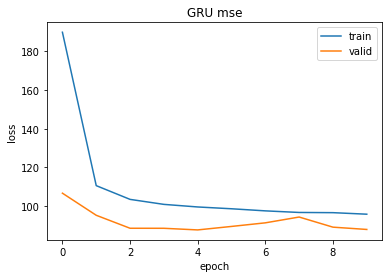

In [65]:
# summarize history for loss
plt.plot(gru_history.history['mse'])
plt.plot(gru_history.history['val_mse'])
plt.title('GRU mse')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

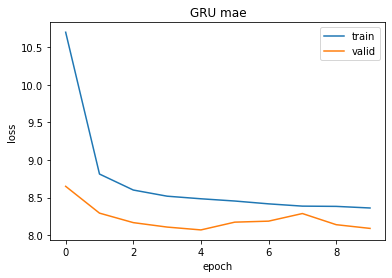

In [66]:
# summarize history for loss
plt.plot(gru_history.history['mae'])
plt.plot(gru_history.history['val_mae'])
plt.title('GRU mae')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [86]:
gru_train_pred = model_gru.predict(train_Xcnn)
gru_valid_pred = model_gru.predict(valid_Xcnn)
gru_test_pred = model_gru.predict(test_Xcnn)
print('Train rmse:', np.sqrt(mean_squared_error(train_y ,gru_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(valid_y, gru_valid_pred)))
print('***************************************************************')
print('Test rmse:', np.sqrt(mean_squared_error(test_y, gru_test_pred)))
print('Test mae :', metrics.mean_absolute_error(test_y, gru_test_pred))
print('Test mse :', metrics.mean_squared_error(test_y, gru_test_pred))

Train rmse: 9.197745795564035
Validation rmse: 9.371172968323066
***************************************************************
Test rmse: 9.238294239470816
Test mae : 8.067197552283542
Test mse : 85.34608045503968


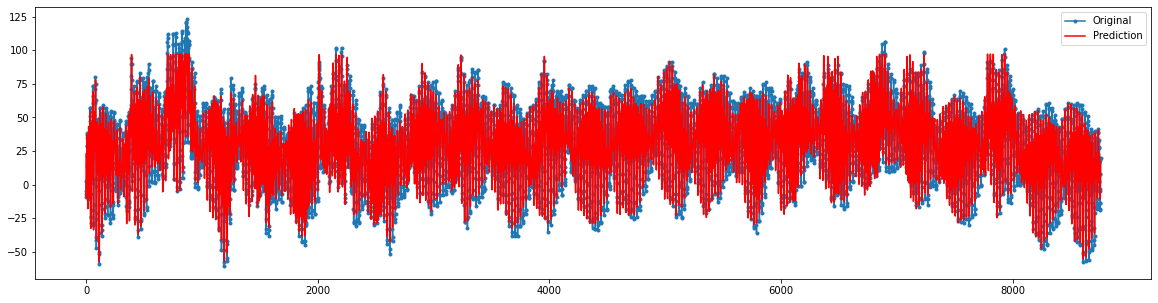

In [87]:
plt.figure(figsize=(20,5))
plt.plot(test_y, marker = '.', label='Original')
plt.plot(gru_test_pred, color='red', label='Prediction')
plt.legend()

4. CNN-LSTM

In [96]:
model_cnn_lstm = Sequential()
model_cnn_lstm.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(train_Xcnn.shape[1], train_Xcnn.shape[2])))
model_cnn_lstm.add(MaxPooling1D(pool_size=2))
model_cnn_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(train_Xcnn.shape[1], train_Xcnn.shape[2]), activation='tanh'))
model_cnn_lstm.add(Dropout(0.2))
model_cnn_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(train_Xcnn.shape[1], train_Xcnn.shape[2]), activation='tanh'))
model_cnn_lstm.add(Dropout(0.2))
model_cnn_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(train_Xcnn.shape[1], train_Xcnn.shape[2]), activation='tanh'))
model_cnn_lstm.add(Dropout(0.2))
model_cnn_lstm.add(LSTM(units=50, activation='tanh'))
model_cnn_lstm.add(Dropout(0.2))
model_cnn_lstm.add(Dense(units=1))
model_cnn_lstm.compile(loss="mse", optimizer="adam",metrics=['mse', 'mae'])

model_cnn_lstm.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 4, 64)             192       
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 2, 64)            0         
 1D)                                                             
                                                                 
 lstm_4 (LSTM)               (None, 2, 50)             23000     
                                                                 
 dropout_24 (Dropout)        (None, 2, 50)             0         
                                                                 
 lstm_5 (LSTM)               (None, 2, 50)             20200     
                                                                 
 dropout_25 (Dropout)        (None, 2, 50)             0         
                                                     

In [97]:
cnn_lstm_history = model_cnn_lstm.fit(train_Xcnn, train_y, validation_data=(valid_Xcnn, valid_y), epochs=10, verbose=2)


Epoch 1/10
7944/7944 - 79s - loss: 197.0689 - mse: 197.0689 - mae: 11.0182 - val_loss: 130.5411 - val_mse: 130.5411 - val_mae: 9.4931 - 79s/epoch - 10ms/step
Epoch 2/10
7944/7944 - 61s - loss: 130.2756 - mse: 130.2756 - mae: 9.5137 - val_loss: 108.0663 - val_mse: 108.0663 - val_mae: 8.8496 - 61s/epoch - 8ms/step
Epoch 3/10
7944/7944 - 67s - loss: 122.5931 - mse: 122.5931 - mae: 9.2756 - val_loss: 104.4535 - val_mse: 104.4535 - val_mae: 8.7513 - 67s/epoch - 8ms/step
Epoch 4/10
7944/7944 - 61s - loss: 118.8951 - mse: 118.8951 - mae: 9.1631 - val_loss: 103.8778 - val_mse: 103.8778 - val_mae: 8.6914 - 61s/epoch - 8ms/step
Epoch 5/10
7944/7944 - 61s - loss: 117.2905 - mse: 117.2905 - mae: 9.1155 - val_loss: 102.2165 - val_mse: 102.2165 - val_mae: 8.6775 - 61s/epoch - 8ms/step
Epoch 6/10
7944/7944 - 62s - loss: 116.2368 - mse: 116.2368 - mae: 9.0820 - val_loss: 104.1700 - val_mse: 104.1700 - val_mae: 8.7290 - 62s/epoch - 8ms/step
Epoch 7/10
7944/7944 - 74s - loss: 114.8329 - mse: 114.8329 - 

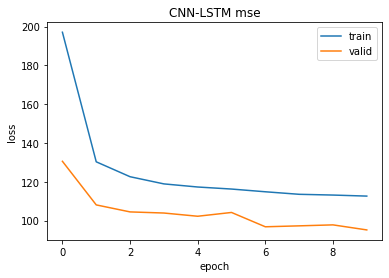

In [98]:
# summarize history for loss
plt.plot(cnn_lstm_history.history['mse'])
plt.plot(cnn_lstm_history.history['val_mse'])
plt.title('CNN-LSTM mse')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

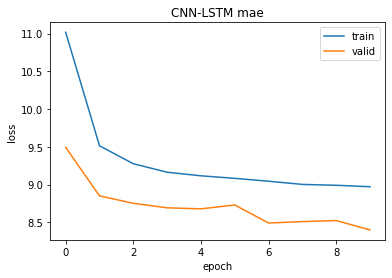

In [102]:
# summarize history for loss
plt.plot(cnn_lstm_history.history['mae'])
plt.plot(cnn_lstm_history.history['val_mae'])
plt.title('CNN-LSTM mae')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [99]:
cnn_lstm_train_pred = model_cnn_lstm.predict(train_Xcnn)
cnn_lstm_valid_pred = model_cnn_lstm.predict(valid_Xcnn)
cnn_lstm_test_pred = model_cnn_lstm.predict(test_Xcnn)

print('Train rmse:', np.sqrt(mean_squared_error(train_y ,cnn_lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(valid_y, cnn_lstm_valid_pred)))
print('Test rmse:', np.sqrt(mean_squared_error(test_y, cnn_lstm_test_pred)))
print('Test mae :', metrics.mean_absolute_error(test_y, cnn_lstm_test_pred))
print('Test mse :', metrics.mean_squared_error(test_y, cnn_lstm_test_pred))

Train rmse: 10.062673644490637
Validation rmse: 9.75554541437567
Test rmse: 9.76129283209949
Test mae : 8.446871936219207
Test mse : 95.2828377539969


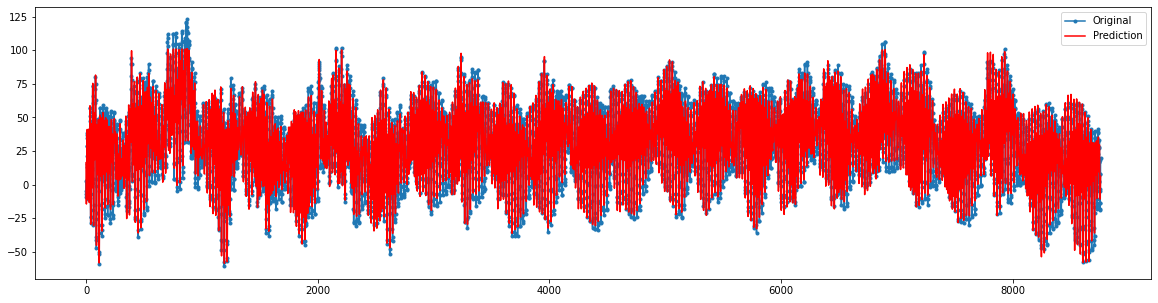

In [100]:
plt.figure(figsize=(20,5))
plt.plot(test_y, marker = '.', label='Original')
plt.plot(cnn_lstm_test_pred, color='red', label='Prediction')
plt.legend()

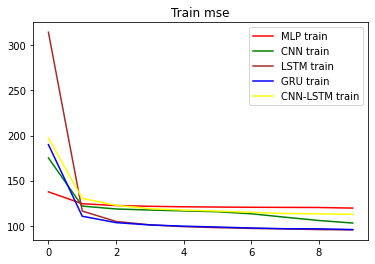

In [105]:
# Loss train
pyplot.plot(mlp_history.history['mse'], label='MLP train', color='red')
pyplot.plot(cnn_history.history['mse'], label='CNN train', color='green')
pyplot.plot(lstm_history.history['mse'], label='LSTM train', color='brown')
pyplot.plot(gru_history.history['mse'], label='GRU train', color='blue')
pyplot.plot(cnn_lstm_history.history['mse'], label='CNN-LSTM train', color='yellow')
pyplot.title('Train mse')


pyplot.legend()
pyplot.show()

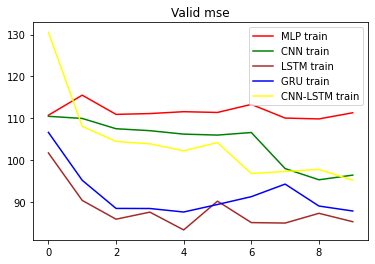

In [106]:
# Loss valid
pyplot.plot(mlp_history.history['val_mse'], label='MLP train', color='red')
pyplot.plot(cnn_history.history['val_mse'], label='CNN train', color='green')
pyplot.plot(lstm_history.history['val_mse'], label='LSTM train', color='brown')
pyplot.plot(gru_history.history['val_mse'], label='GRU train', color='blue')
pyplot.plot(cnn_lstm_history.history['val_mse'], label='CNN-LSTM train', color='yellow')
pyplot.title('Valid mse')


pyplot.legend()
pyplot.show()

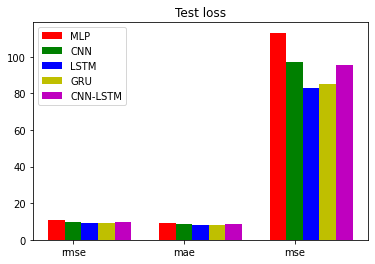

In [109]:
import numpy as np
import matplotlib.pyplot as pyplot

N = 3
mlp = (10.64, 9.08, 113.20)
cnn = (9.84, 8.50, 96.92)
lstm=(9.12, 7.98, 83.21)
gru=(9.23, 8.06, 85.34)
cnn_lstm=(9.76, 8.44, 95.28)

width = 0.15       # the width of the bars

ind = np.arange(N)  # the x locations for the groups


fig = pyplot.figure()
ax = fig.add_subplot(111)

mlp= ax.bar(ind,mlp,width,color='r')
cnn= ax.bar(ind+width,cnn,width,color='g')
lstm= ax.bar(ind+2*width,lstm,width,color='b')
gru= ax.bar(ind+3*width,gru,width,color='y')
cnn_lstm= ax.bar(ind+4*width,cnn_lstm,width,color='m')

# add some text for labels, title and axes ticks
ax.set_title('Test loss')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('rmse', 'mae', 'mse') )

ax.legend((mlp[0],cnn[0],lstm[0],gru[0],cnn_lstm[0]),('MLP','CNN','LSTM','GRU','CNN-LSTM'))

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%d'%int(height),
                ha='center', va='bottom')


pyplot.show()